<a href="https://colab.research.google.com/github/DarshiniMH/Exploratory_Data_analysis/blob/main/book_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505174 sha256=53628242bb07f04d2643cf4658f3f93cabe083851e1a32a5d2e295255d2d2474
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [2]:
!unzip '/content/drive/MyDrive/Book recommendations.zip'

Archive:  /content/drive/MyDrive/Book recommendations.zip
  inflating: Books.csv               
  inflating: __MACOSX/._Books.csv    
  inflating: Ratings.csv             
  inflating: __MACOSX/._Ratings.csv  
  inflating: Users.csv               
  inflating: __MACOSX/._Users.csv    


#data analysis


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from surprise.model_selection import train_test_split, KFold
from surprise.prediction_algorithms.matrix_factorization import SVD

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

In [4]:
book = pd.read_csv('/content/Books.csv')
rating = pd.read_csv('/content/Ratings.csv')
user = pd.read_csv('/content/Users.csv')

In [5]:
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [6]:
rating['Book-Rating'].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


In [7]:
rating['User-ID'].value_counts()

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [8]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [9]:
df =pd.merge(rating,book.drop_duplicates(['ISBN']), on='ISBN', how='left')

In [10]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [11]:
df.drop(['Image-URL-S','Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

In [12]:
df.rename(columns={
    'User-ID': 'user_id',
    'Book-Rating': 'rating',
    'ISBN' : 'book_id',
    'Book-Title' : 'title',
    'Book-Author': 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher'
}, inplace=True)

In [13]:
df.head()

,user_id,book_id,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1149780 non-null  int64 
 1   book_id    1149780 non-null  object
 2   rating     1149780 non-null  int64 
 3   title      1031136 non-null  object
 4   author     1031134 non-null  object
 5   year       1031136 non-null  object
 6   publisher  1031134 non-null  object
dtypes: int64(2), object(5)
memory usage: 61.4+ MB


In [15]:
df.isnull().sum()

,0
user_id,0
book_id,0
rating,0
title,118644
author,118646
year,118644
publisher,118646


In [16]:
df

,user_id,book_id,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic


In [17]:
df['book_id'] = df['book_id'].astype(str)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1149780 non-null  int64 
 1   book_id    1149780 non-null  object
 2   rating     1149780 non-null  int64 
 3   title      1031136 non-null  object
 4   author     1031134 non-null  object
 5   year       1031136 non-null  object
 6   publisher  1031134 non-null  object
dtypes: int64(2), object(5)
memory usage: 61.4+ MB


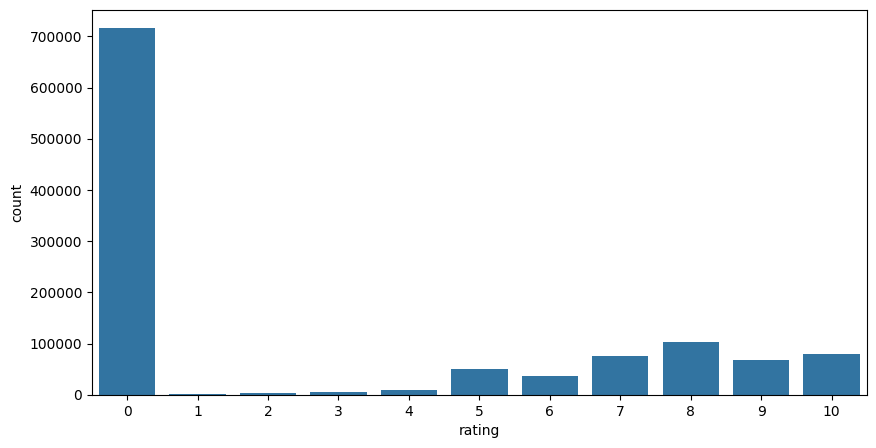

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating')
plt.show()

In [20]:
df.drop(df[df['rating']==0].index, inplace=True)

<Axes: xlabel='rating', ylabel='count'>

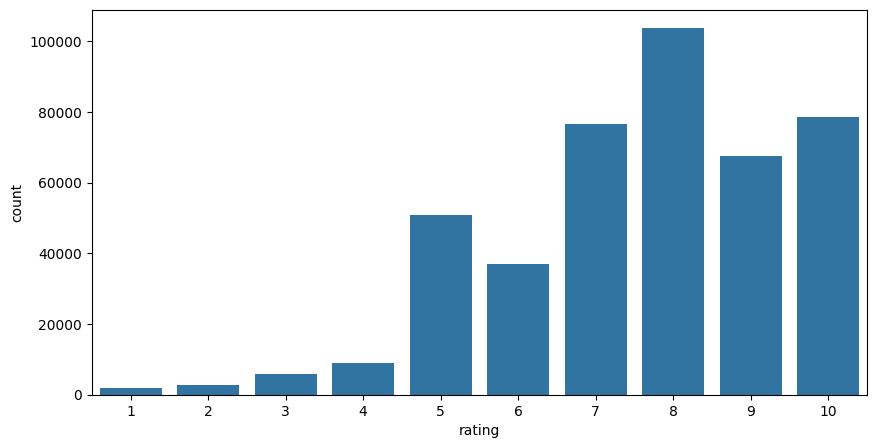

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    433671 non-null  int64 
 1   book_id    433671 non-null  object
 2   rating     433671 non-null  int64 
 3   title      383842 non-null  object
 4   author     383840 non-null  object
 5   year       383842 non-null  object
 6   publisher  383840 non-null  object
dtypes: int64(2), object(5)
memory usage: 26.5+ MB


In [23]:
df['user_id'].nunique()

77805

In [24]:
df.book_id.nunique()

185973

In [25]:
df.groupby(['user_id','book_id'])['rating'].count()

user_id  book_id   
8        0002005018    1
         074322678X    1
         0887841740    1
         1552041778    1
         1567407781    1
                      ..
278854   0375703063    1
         042516098X    1
         0425163393    1
         0553275739    1
         0553579606    1
Name: rating, Length: 433671, dtype: int64

In [26]:
df['book_id'].value_counts()

,count
book_id,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
...,...
0140441905,1
0886777267,1
0671697951,1


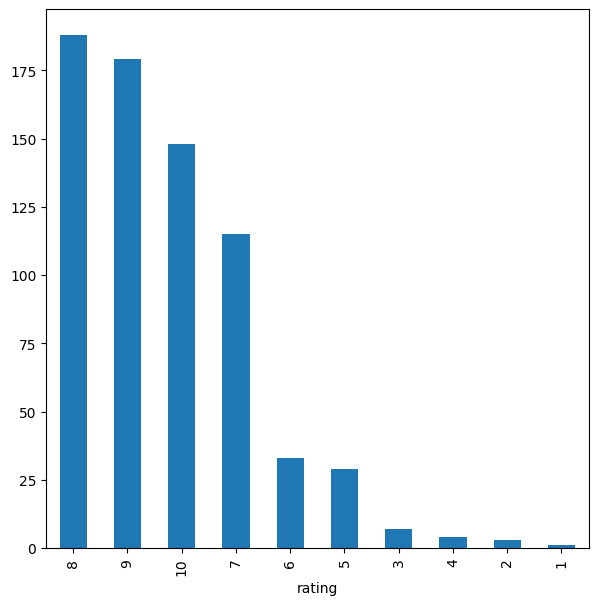

In [27]:
plt.figure(figsize=(7,7))
df[df['book_id']=='0316666343']['rating'].value_counts().plot(kind='bar')
plt.show()

In [28]:
df['user_id'].value_counts()

,count
user_id,
11676,8524
98391,5802
153662,1969
189835,1906
23902,1395
...,...
114079,1
114081,1
114096,1


In [29]:
df[df['user_id']==11676]['rating'].value_counts()

,count
rating,
8,2138
7,1597
10,1287
9,1038
6,873
5,835
4,294
3,217
1,133


In [30]:
df.head()

,user_id,book_id,rating,title,author,year,publisher
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
6,276736,3257224281,8,NaN,NaN,NaN,NaN
7,276737,0600570967,6,NaN,NaN,NaN,NaN


In [31]:
df[df.groupby('user_id').count()<50]

,user_id,book_id,rating,title,author,year,publisher
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1149773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149778,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
users = df['user_id']
users

,user_id
1,276726
3,276729
4,276729
6,276736
7,276737
...,...
1149773,276704
1149775,276704
1149777,276709
1149778,276721


In [33]:
rating_count = dict()
for user in users:
  if user in rating_count:
    rating_count[user]+=1
  else:
    rating_count[user]=1

In [34]:
RATING_CUTOFF = 50
remove_users= []

for user, rating in rating_count.items():
  if rating<RATING_CUTOFF:
    remove_users.append(user)

In [35]:
df= df.loc[~df['user_id'].isin(remove_users)]

In [36]:
df.shape

(175023, 7)

In [37]:
df['user_id'].value_counts()

,count
user_id,
11676,8524
98391,5802
153662,1969
189835,1906
23902,1395
...,...
166017,50
164008,50
116183,50


In [38]:
df= df[df.groupby('book_id')['rating'].transform('count')>=10]

In [39]:
df.nunique()

,0
user_id,1257
book_id,1497
rating,10
title,1367
author,587
year,43
publisher,204


In [40]:
df['book_id'].value_counts()

,count
book_id,
0316666343,145
0385504209,106
059035342X,90
0679781587,85
043935806X,84
...,...
0671689746,10
0440204194,10
0425130711,10


In [41]:
df.groupby('user_id')['book_id'].count()

,book_id
user_id,
254,18
638,20
643,3
1025,7
1211,3
...,...
277427,36
278026,11
278137,8


In [42]:
count_interaction= df.groupby('user_id')['book_id'].count()

<Axes: xlabel='book_id', ylabel='Count'>

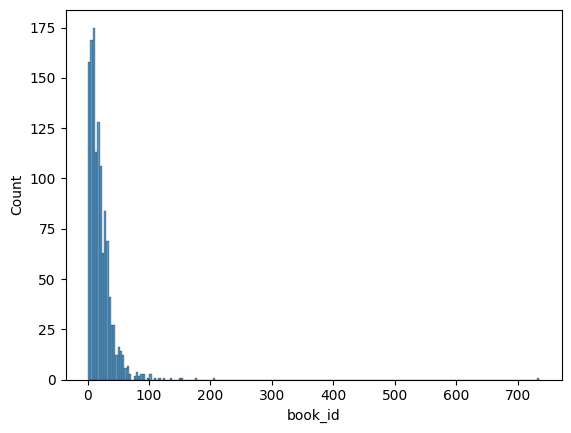

In [43]:
sns.histplot(count_interaction)

#Rank based recommedation

rank based in to address cold start

In [44]:
average_rating = df.groupby('book_id')['rating'].mean()

In [45]:
count_rating = df.groupby('book_id')['rating'].count()
count_rating

,rating
book_id,
0020442203,11
002542730X,28
0028604199,10
0060002050,10
006000438X,15
...,...
1573229725,17
1576737330,16
1592400876,25


In [46]:
final_rating = pd.DataFrame({
    'avg_rating': average_rating,
    'rating_count': count_rating
})
final_rating

,avg_rating,rating_count
book_id,,
0020442203,8.727273,11
002542730X,7.428571,28
0028604199,8.000000,10
0060002050,7.800000,10
006000438X,7.666667,15
...,...,...
1573229725,9.117647,17
1576737330,7.437500,16
1592400876,8.840000,25


In [47]:
final_rating['rating_count'].value_counts().sort_values(ascending=True).head(20)

,count
rating_count,
68,1
51,1
85,1
62,1
90,1
55,1
74,1
52,1
81,1


In [48]:
def top_n_books(data, n, min_interactions=100):
  recommendations = data[data['rating_count']>min_interactions]
  recommendations = recommendations.sort_values(by='avg_rating', ascending=False)
  return recommendations.head(n)

In [49]:
res = top_n_books(final_rating, 5,10)
res

,avg_rating,rating_count
book_id,,
0618002235,9.928571,14
0439425220,9.909091,11
0743454529,9.818182,11
0060256656,9.769231,13
006092988X,9.666667,12


In [50]:
list_of_books = []
for i in res.index:
  list_of_books.append(df[df['book_id']==str(i)]['title'].unique()[0])

list_of_books

['The Two Towers (The Lord of the Rings, Part 2)',
 'Harry Potter and the Chamber of Secrets Postcard Book',
 "My Sister's Keeper : A Novel (Picoult, Jodi)",
 'The Giving Tree',
 'A Tree Grows in Brooklyn']

In [51]:
res2 = top_n_books(final_rating, 5,100)
list_of_books_1 = []
for i in res2.index:
  list_of_books_1.append(df[df['book_id']==str(i)]['title'].unique()[0])

list_of_books_1

['The Da Vinci Code', 'The Lovely Bones: A Novel']

#Collaborative Filtering

In [52]:
from surprise import accuracy
from surprise.reader import Reader
from surprise import dataset

from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms.knns import KNNBasic

In [71]:
def precision_recall_at_k(model, k=10, threshold=0.7):
  user_est_true = defaultdict(list)


  predictions = model.test(testset)


  for uid, _, true_r, est, _ in predictions:
    user_est_true[uid].append((est,true_r))

  precisions = dict()
  rcalls = dict()

  for uid, user_ratings in user_est_true.items():
    user_ratings.sort(key=lambda x:x[0], reverse= True)

    n_rel = sum((true_r>=threshold for (_, true_r) in user_ratings))

    n_rec_k = sum(((est>=threshold) for (est,_) in user_ratings[:k] ))

    n_rel_and_rec_k = sum(((true_r>=threshold) and (est>=threshold) for est, true_r in user_ratings[:k]))
    precisions[uid] = n_rel_and_rec_k/n_rec_k if n_rec_k !=0 else 1

    rcalls[uid] = n_rel_and_rec_k/n_rel if n_rel !=0 else 1

  precision = round(sum(prec for prec in precisions.values())/len(precisions),3)
  recall = round(sum(rec for rec in rcalls.values())/len(rcalls),3)

  accuracy.rmse(predictions)
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  f1 = 2*precision*recall/(precision+recall)
  print(f'F1 Score: {round(f1,3)}')
  return precisions, rcalls


In [54]:
import sklearn.preprocessing as LabelEncoder
data = df[['user_id','book_id']].apply(LabelEncoder.LabelEncoder().fit_transform)
data['rating'] = df['rating']
data

,user_id,book_id,rating
1211,1251,521,9
1213,1251,524,9
1214,1251,525,8
1456,1252,1,10
1474,1252,52,9
...,...,...,...
1149564,1250,928,7
1149581,1250,1288,9
1149592,1250,1316,7
1149627,1250,1483,10


In [55]:
df_rating = data.copy()

In [56]:
average_rating = data.groupby('book_id')['rating'].mean()
count_rating = data.groupby('book_id')['rating'].count()
final_rating = pd.DataFrame({
    'avg_rating': average_rating,
    'rating_count': count_rating
})
final_rating

,avg_rating,rating_count
book_id,,
0,8.727273,11
1,7.428571,28
2,8.000000,10
3,7.800000,10
4,7.666667,15
...,...,...
1492,9.117647,17
1493,7.437500,16
1494,8.840000,25


In [57]:
reader = Reader(rating_scale=(1,10))
data = dataset.Dataset.load_from_df(data[['user_id', 'book_id', 'rating']], reader)

In [58]:
trainset, testset = train_test_split(data, test_size=0.3, random_state=42)

In [61]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}
algo_knn_user = KNNBasic(sim_options= sim_options, verbose=False)
algo_knn_user.fit(trainset)

In [72]:
p= precision_recall_at_k(algo_knn_user)

RMSE: 1.8455
Precision: 1.0
Recall: 0.941
F1 Score: 0.97


In [76]:
df_rating['book_id'].max()

1496

In [73]:
algo_knn_user.predict(1326, 12126, r_ui= 8, verbose=True)

user: 1326       item: 12126      r_ui = 8.00   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=12126, r_ui=8, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [78]:
algo_knn_user.predict(1326, 215, verbose=True)

user: 1326       item: 215        r_ui = None   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=215, r_ui=None, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [79]:
param_grid = {
    'k': [20,30,40],
    'min_k': [1,3,6],
    'sim_options': {
        'name': ['cosine', 'msd'],
        'user_based': [True]
    }
}

In [80]:
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

In [81]:
gs.fit(data)

In [82]:
gs

In [83]:
gs.best_params

{'rmse': {'k': 20,
  'min_k': 6,
  'sim_options': {'name': 'msd', 'user_based': True}},
 'mae': {'k': 20,
  'min_k': 6,
  'sim_options': {'name': 'msd', 'user_based': True}}}

In [84]:
gs.best_score

{'rmse': 1.6992538561407171, 'mae': 1.3026914447000282}

In [85]:
sim_options = {
    'name': 'msd',
    'user_based': True
}
simmilarity_algo_optimized = KNNBasic(k=20, min_k=6, sim_options= sim_options, verbose=False)

In [86]:
simmilarity_algo_optimized.fit(trainset)

In [88]:
p1=precision_recall_at_k(simmilarity_algo_optimized)

RMSE: 1.6866
Precision: 1.0
Recall: 0.941
F1 Score: 0.97


In [91]:
simmilarity_algo_optimized.predict(1326, 2150, verbose=True)

user: 1326       item: 2150       r_ui = None   est = 7.99   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=1326, iid=2150, r_ui=None, est=7.9887628424657535, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [93]:
simmilarity_algo_optimized.get_neighbors(1, k=9)

[7, 23, 95, 107, 109, 195, 208, 231, 256]

In [94]:
def get_recommendations(data, user_id, top_n, algo):
  recommendations = []
  user_item_interaction = data.pivot(index='user_id', columns= 'book_id', values='rating')

  non_interacted_items = user_item_interaction.loc[user_id][user_item_interaction.loc[user_id].isnull()].index.tolist()

  for book_id in non_interacted_items:
    est = algo.predict(user_id, book_id).est
    recommendations.append((book_id, est))

  recommendations.sort(key=lambda x:x[1], reverse=True)

  return recommendations[:top_n]

In [95]:
df_rating = df_rating.drop_duplicates()
df_rating

,user_id,book_id,rating
1211,1251,521,9
1213,1251,524,9
1214,1251,525,8
1456,1252,1,10
1474,1252,52,9
...,...,...,...
1149564,1250,928,7
1149581,1250,1288,9
1149592,1250,1316,7
1149627,1250,1483,10


In [97]:
recommendations = get_recommendations(df_rating, 1, 5, simmilarity_algo_optimized)

In [101]:
pd.DataFrame(
    recommendations,
    columns = ['book_id', 'predicted_ratings']

)

,book_id,predicted_ratings
0,259,10.000000
1,1297,9.884446
2,658,9.870802
3,639,9.764398
4,451,9.702661
